# Neural Network Project

In this nootbook we are going to implement the method proposed in the paper [1] [Introducing Convolutions to Vision Transformers](https://arxiv.org/pdf/2103.15808) (Haiping Wu, in 2021)

For General instruction to running this code please find readme file in the Github repository.

Shahkar Javid - javid.2047305@studenti.uniroma1.it

Sameer Ahmed - ahmed.2047250@studenti.uniroma1.it

# INTRODUCTION
This section contains a description of the methods we have implemented, both from the paper perspective and from our point of view.

# Paper description

The paper introduce a new architecture, named Convolutional vision transformer (CvT),that improves Vision
Transformer (ViT) in performance and efficiency by introducing convolutions into ViT to yield the best of both designs.This is accomplished through two primary modifications: a hierarchy of Transformers containing a new convolutional token embedding, and a convolutional Transformer
block.
According to paper these modification convolutional neural networks (CNNs) to the ViT architecture (i.e. shift, scale,
and distortion invariance). The authors of the paper conduct extensive experiments, showing that this approach achieves
state-of-the-art performance over other Vision Transformers and ResNets on ImageNet-1k, with fewer parameters but only when pretrained on larger datasets (e.g. ImageNet-22k) and fine-tuned to downstream tasks.
The paper also proposed to remove positional encoding, a crucial component in existing Vision Transformers; which has no effect on the model accuracy hence simplifying the design for higher resolution vision tasks.

Before going into details of CVT, the paper start by giving slight background of original vision tranformer (ViT) proposed in [An Image is Worth 16x16 Words](https://arxiv.org/pdf/2010.11929v2) paper [2] in 2020. The ViT design adapts Transformer architectures; First, images are split into discrete nonoverlapping patches (e.g. 16 × 16). Then, these patches are treated as tokens (analogous to tokens in NLP), summed with a special positional encoding to represent coarse spatial information, and input into repeated standard Transformer layers to model global relations for classification.The Vision Transformer (ViT) is the first to prove that a pure Transformer architecture can attain state-of-the-art performance (e.g. ResNets, EfficientNet) on image classification when the data is large enough (i.e. on ImageNet-22k, JFT-300M).

Despite the success of vision Transformers at large scale, the performance is still below similarly sized convolutional neural network (CNN counterparts (e.g., ResNets) when trained on smaller amounts of data. One possible reason may be that ViT lacks certain desirable properties inherently built into the CNN architecture that make CNNs uniquely suited to solve vision tasks. For example, images have a strong 2D local structure: spatially neighboring pixels are usually highly correlated.

So in the paper, authors hypothesize that convolutions can be strategically introduced to the ViT structure to improve performance and robustness, while concurrently maintaining a high degree of computational and memory efficiency.To verify, paper present afforementioned architecture, called the Convolutional vision Transformer (CvT), which incorporates convolutions into the Transformer.

# CvT Architecture

The CvT design introduces convolutions to two core sections of the ViT architecture. First, we partition the Transformers into multiple stages that form a hierarchical structure of Transformers. The beginning of each stage consists of a convolutional token embedding that performs an overlapping convolution operation with stridethe (degree of overlap can be controlled via the stride length) on a 2D-reshaped token map (i.e., reshaping flattened token sequences back to the spatial grid), followed by layer normalization. Formally, given a 2D image or a 2D-reshaped output token map from a previous stage as the input to stage i, we learn a function f(·)that maps into new tokens with a channel size Ci
, where f(·) is 2D convolution operation of kernel size s × s, strides − o and p padding (to deal with boundary conditions).
The new token map Hi×Wi×Ci has height and width is then flattened into size HiWi × Ci and normalized by layer normalization for input into the subsequent Transformer blocks of stage i.

 Second, the linear projection prior to every self-attention block in the Transformer module is replaced with our proposed convolutional projection.This allows the model to further capture local spatial context and reduce semantic ambiguity in the attention mechanism.

 <div>

<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2021-07-20_at_11.50.20_AM_1CVroUG.png" width="800" alt="CvT Architecture Figure"/>

</div>



In the paper, authers implemented three configuration of Convolutional Vision Transformer i.e CvT-13, CvT-21 and CvT-W24 with difference of only some hyperperameters. For evalution author pretrained the model with imagenet datasets with batch size of 2028 and then fine tuned it on Cifar10, Cifar100, Oxford-IIIT Pets and Oxford-IIIT Flowers with batch size of 512. Cvt-W24 was found to be best performing among other with comparatively lower parameters.

<div>

<img src="https://d3i71xaburhd42.cloudfront.net/e775e649d815a02373eac840cf5e33a04ff85c95/6-Table2-1.png" width="600" alt="CvT versions"/>

</div>

# Our Approach

After reading the paper we decided to re-implement the CvT-13 version of convolutional vision transformer on a low scale.In the paper, CvT model was pretrained on imagenet dataset for 300 epoch and then further finetuned on relatively small dataset like Cifar10. As due to our GPU limitation we decided to pre-trained our model on Cifar100 and then finetuned it on other small datasets [3] [5] for a binary and multi classification problem.  We also tried our best to follow similar architecture as proposed in original CvT but with alot of hyperparameter changes to run it on our machine faster and efficiently.

In the paper, model was pre-trained with an input resolution of "224 X 224" and fine-tuned resolution of "384 X 384"; but in our model we decided to feed input of 32 X 32 both at pre-training and fine tuning. we pre-trained our model for 350 epoch at 512 bactch size.

After implementing all the architecture we tried different experiments to compare our result with different dataset that our machine could handle.

# Code

This section includes the code implementation and the instructions to run it.


# General Instruction

- We have already pre-trained our model for 350 epoch at bacth size of 512 , saved model can be found at our github repository. [Here](https://github.com/shahkarKhan24/CvT_NN_Project)
- If you wise to run the code and pretrained all over againjust run the blocks sequentially.
- For pre-training cifar100 dataset must be downloaded.
- For fine tuning we have considered catVsdog data set which can be downloaded from [download dataset](https://www.microsoft.com/en-us/download/details.aspx?id=54765) [3], and Food dataset with 11 classes which can be downloaded from [download dataset](https://www.kaggle.com/datasets/trolukovich/food11-image-dataset?select=training) [5].
- Must be connected to a GPU.
- Change the Hyper parameter according to your need, it will not give any error but might effect accuracy and training time.
- Check and install necessary import library before running the code

# Datasets Details

Cifar100 was used for pretraining.
- Classes: 100
- Total images: 60000
- Train: 50000
- Test: 10000

Cat Vs Dog dataset was used for fine-tuning [3]
- Classes: 2
- Total images: 24998
- Train: 17499
- Test: 7499

Food dataset was used for fine-tuning [5]
- Classes: 11
- Total images: 13434
- Train: 9404
- Test: 4030


# Install Libraries
Run below block only if the mentioned library are not already installed.

In [156]:
!pip install einops
!pip install torch
!pip install numpy
!pip intall matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Initialize Important Libraries

In [33]:
import gc
import torch
import numpy as np
import torchvision
from tqdm import tqdm 
from torch import optim
from einops import repeat
from einops import rearrange
from torch import nn, einsum
import matplotlib.pyplot as plt
from torchvision import datasets
from torchsummary import summary
from matplotlib.pyplot import figure
from torch.utils.data import DataLoader
from einops.layers.torch import Rearrange
from torch.autograd import Variable as var
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms  
#from module import ConvAttention, PreNorm, FeedForward
#from google.colab import files

This block of code is only to clear cache of GPU, because sometime when large batchsize are used our GPU ran out of memory.

In [34]:
gc.collect()
torch.cuda.empty_cache()

# Hyperparameters

We have selected below hyperparameter for pre-training and fine tuning considering our GPU capabilities.

**Pretraining**

Number of Epochs = 350.

Batch Size = 512.

Input Size = 32.

Initial Learning rate (scheduler cosine annealing) = 0.02(as per paper [1])

Optimizer = AdamW optimizer (as per paper [1])

Loss Function=  Cross Entropy loss

**Fine-Tuning**
 
Food Dataset/CatVDog Dataset

Number of Epochs = 50

Batch Size = 256

Input Size = 32

Learning rate = 0.1

Optimizer = SGD, momentum =0.9

Loss Function =  Cross Entropy loss/Binary cross Entropy

Set or change hyperparameters according to your requirement.

In [35]:
# Hyperparameters for Pre-Training

# in_channels = 3
num_classes = 100 #We are using Cifar100
batch_size = 512 #As per CvT paper bacth size is 2048 
num_epochs = 350 #As per CvT paper (300)
in_channel = 3
image_size = 32


# Loading Dataset
This section is downloading and transofrming dataset for pre-training. in our case its Cifar100 data

In [36]:

transform=transforms.Compose([transforms.ToTensor(),transforms.Resize((32,32)),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load Data
dataset_cifar100_train = datasets.CIFAR100(
    root="dataset/", train=True, download=False, transform=transform)

dataset_cifar100_test = datasets.CIFAR100(
    root="dataset/", train=False, download=True, transform=transform)

print(len(dataset_cifar100_train))
print(len(dataset_cifar100_test))

train_loader_cifar100 = DataLoader(dataset=dataset_cifar100_train, batch_size=batch_size, shuffle=True)
test_loader_cifar100 = DataLoader(dataset=dataset_cifar100_test, batch_size=batch_size, shuffle=True)
sample_img=DataLoader(dataset=dataset_cifar100_train, batch_size=40, shuffle=True)


Files already downloaded and verified
50000
10000


In [37]:
train_Data_cifar100 = enumerate(train_loader_cifar100)
_train, (train_X_cifar100, train_Y_cifar100) = next(train_Data_cifar100)# returns current iteration index, data and labels

test_Data_cifar100 = enumerate(test_loader_cifar100)
_test, (test_X_cifar100, test_Y_cifar100) = next(test_Data_cifar100)# returns current iteration index, data and labels

dataiter = iter(sample_img)
images, labels = next(dataiter)
print(len(train_loader_cifar100))
print(len(train_Y_cifar100))

98
512


# Show Some random Images from dataset

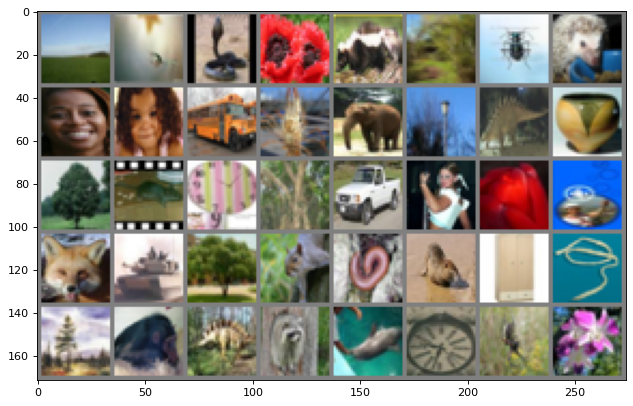

In [38]:

def show_image(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy() # convert from tensor
    figure(figsize=(15, 6), dpi=80)
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #Convert (3,32,32) to (32,32,3)
    plt.show()

show_image(torchvision.utils.make_grid(images))

# Model Implementation
We have borrowed multi-head-attention layer in our tranformer from mentioned github repo.[lucidrains](https://github.com/lucidrains/vit-pytorch) [6].Although the code is written by ourself but the structure and algorithm for model is inspired by this rich github repo [lucidrains](https://github.com/lucidrains/vit-pytorch) [6].


- Transformer module
- CVT Model

In [51]:
# Transformer Module

class Conv2D_atten_in(nn.Module):
    def __init__(self,in_channels, out_channels, kernel_size,  stride=1, padding=0, dilation=1,):
        super(Conv2D_atten_in, self).__init__()
        self.depthwise_layer = nn.Conv2d(in_channels, in_channels,  kernel_size=kernel_size, stride=stride, padding=padding, dilation=dilation, groups=in_channels)
        self.pointwise_layer = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.batch_Norm = nn.BatchNorm2d(in_channels)

    def forward(self, x):
        return self.pointwise_layer(self.batch_Norm(self.depthwise_layer(x)))

class FeedForward_layer(torch.nn.Module):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__()
        self.network = torch.nn.Sequential(
            torch.nn.Linear(dim, hidden_dim),
            torch.nn.GELU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden_dim, dim),
            torch.nn.Dropout(dropout)
        )
    def forward(self, x):
        return self.network(x)



class ConvAttention_layer(nn.Module):
    def __init__(self, dim, img_size, heads = 8, dim_head = 64, kernel_size=3, q_stride=1, k_stride=1, v_stride=1, dropout = 0.,
                 last_stage=False):

        super().__init__()
        
        inner_dim = dim_head *  heads
        self.img_size = img_size
        self.last_stage = last_stage
        projects_Out = not (heads == 1 and dim_head == dim)
        self.scale = dim_head ** -0.5
        self.heads = heads
        padding = (kernel_size - q_stride)//2
        self.to_k_value = Conv2D_atten_in(dim, inner_dim, kernel_size, k_stride, padding)
        self.to_q_value = Conv2D_atten_in(dim, inner_dim, kernel_size, q_stride, padding)
        self.to_v_value = Conv2D_atten_in(dim, inner_dim, kernel_size, v_stride, padding)

        
        self.to_out_layer = torch.nn.Sequential(
            torch.nn.Linear(inner_dim, dim),
            torch.nn.Dropout(dropout)
        ) if projects_Out else torch.nn.Identity()

    def forward(self, x):
        b, n, _, h = *x.shape, self.heads
        if self.last_stage:
            cls_token_value = x[:, 0]
            x = x[:, 1:]
            cls_token_value = rearrange(cls_token_value.unsqueeze(1), 'b n (h d) -> b h n d', h = h)
        x_value = rearrange(x, 'b (l w) n -> b n l w', l=self.img_size, w=self.img_size)
        q_value = self.to_q_value(x_value)
        q_value = rearrange(q_value, 'b (h d) l w -> b h (l w) d', h=h)

        v_value = self.to_v_value(x_value)
        v_value = rearrange(v_value, 'b (h d) l w -> b h (l w) d', h=h)

        k_value = self.to_k_value(x_value)
        k_value = rearrange(k_value, 'b (h d) l w -> b h (l w) d', h=h)

        if self.last_stage:
            q_value = torch.cat((cls_token_value, q_value), dim=2)
            v_value = torch.cat((cls_token_value, v_value), dim=2)
            k_value = torch.cat((cls_token_value, k_value), dim=2)


        value_dots = einsum('b h i d, b h j d -> b h i j', q_value, k_value) * self.scale

        attention = value_dots.softmax(dim=-1)

        output = einsum('b h i j, b h j d -> b h i d', attention, v_value)
        output = rearrange(output, 'b h n d -> b n (h d)')
        output =  self.to_out_layer(output)
        return output

class Normalization(torch.nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm_layer = torch.nn.LayerNorm(dim)
        self.fn_1 = fn
    def forward(self, x, **kwargs):
        return self.fn_1(self.norm_layer(x), **kwargs)

class Transformer_layer(torch.nn.Module):
    def __init__(self, dim, img_size, depth, heads, dim_head, mlp_dim, dropout=0., last_stage=False):
        super().__init__()
        self.Complete_layer = torch.nn.ModuleList([])

        for _ in range(depth):
            self.Complete_layer.append(torch.nn.ModuleList([
                Normalization(dim, ConvAttention_layer(dim, img_size, heads=heads, dim_head=dim_head, dropout=dropout, last_stage=last_stage)),
                Normalization(dim, FeedForward_layer(dim, mlp_dim, dropout=dropout))
            ]))

    def forward(self, x):
        for ConvAtttention, feedForward in self.Complete_layer:
            output = ConvAtttention(x) + x
            output = feedForward(output) + output
        return output


In [52]:
# CvT Model

class Convolutional_Vision_Transoformers(torch.nn.Module):
    def __init__(self, image_size, in_channels, num_classes, dim=64, kernels=[7, 3, 3], strides=[4, 2, 2],
                 heads=[1, 3, 6] , depth = [1, 2, 10], pool='cls', dropout=0., emb_dropout=0., scale_dim=4):
        super().__init__()
        assert pool in {'cls', 'mean'}, 'pool type must be either cls (cls token) or mean (mean pooling)'
        self.pooling = pool
        self.dimensions = dim
        #-----------------------------------Stage 1-------------------------------------------------------
        self.ConvEmbeeding_stage1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels, dim, kernels[0], strides[0], 2),
            Rearrange('b c h w -> b (h w) c', h = image_size//4, w = image_size//4),
            torch.nn.LayerNorm(dim)
        )
        
        self.transformer_stage1 = nn.Sequential(
            Transformer_layer(dim=dim, img_size=image_size//4,depth=depth[0], heads=heads[0], dim_head=self.dimensions,
                                              mlp_dim=dim * scale_dim, dropout=dropout),
            Rearrange('b (h w) c -> b c h w', h = image_size//4, w = image_size//4)
        )
        #------------------------------------Stage 2---------------------------------------------------------
        in_channels = dim
        scale = heads[1]//heads[0]
        dim = scale*dim
        self.ConvEmbeeding_stage2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels, dim, kernels[1], strides[1], 1),
            Rearrange('b c h w -> b (h w) c', h = image_size//8, w = image_size//8),
            torch.nn.LayerNorm(dim)
        )
        self.transformer_stage2 = nn.Sequential(
            Transformer_layer(dim=dim, img_size=image_size//8, depth=depth[1], heads=heads[1], dim_head=self.dimensions,
                                              mlp_dim=dim * scale_dim, dropout=dropout),
            Rearrange('b (h w) c -> b c h w', h = image_size//8, w = image_size//8)
        )

        #-------------------------------------Stage 3--------------------------------------------------------
        in_channels = dim
        scale = heads[2] // heads[1]
        dim = scale * dim
        self.ConvEmbeeding_stage3 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels, dim, kernels[2], strides[2], 1),
            Rearrange('b c h w -> b (h w) c', h = image_size//16, w = image_size//16),
            torch.nn.LayerNorm(dim)
        )
        self.transformer_stage3 = torch.nn.Sequential(
            Transformer_layer(dim=dim, img_size=image_size//16, depth=depth[2], heads=heads[2], dim_head=self.dimensions,
                                              mlp_dim=dim * scale_dim, dropout=dropout, last_stage=True),
        )


        self.cls_token_value = torch.nn.Parameter(torch.randn(1, 1, dim))
        self.dropout_layer = torch.nn.Dropout(emb_dropout)


        self.Head_mlp = torch.nn.Sequential(
            torch.nn.LayerNorm(dim),
            torch.nn.Linear(dim, num_classes)
        )

    def forward(self, img):
        
        stage_x = self.ConvEmbeeding_stage1(img)
        stage_x = self.transformer_stage1(stage_x)

        stage_x = self.ConvEmbeeding_stage2(stage_x)
        stage_x = self.transformer_stage2(stage_x)

        stage_x = self.ConvEmbeeding_stage3(stage_x)

        value_b, value_n, _ = stage_x.shape
        cls_tokens_value = repeat(self.cls_token_value, '() n d -> b n d', b=value_b)
        stage_x = torch.cat((cls_tokens_value, stage_x), dim=1)
        stage_x = self.transformer_stage3(stage_x)
        stage_x = stage_x.mean(dim=1) if self.pooling == 'mean' else stage_x[:, 0]

        stage_x = self.Head_mlp(stage_x)
        
        return stage_x

In [53]:
# in_channel = 3
# num_classes = 100
# image_size = 32
model = Convolutional_Vision_Transoformers(image_size,in_channel,num_classes)
lossfunct = nn.CrossEntropyLoss()   

optimizer = optim.AdamW(model.parameters(), lr = 0.02, weight_decay=0.05)         #(According to the paper)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)  #(According to the paper)
lrs = []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
# model = nn.DataParallel(model)
model.to(device)


True
1
NVIDIA GeForce RTX 3050 Laptop GPU


Convolutional_Vision_Transoformers(
  (ConvEmbeeding_stage1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(2, 2))
    (1): Rearrange('b c h w -> b (h w) c', h=8, w=8)
    (2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (transformer_stage1): Sequential(
    (0): Transformer_layer(
      (Complete_layer): ModuleList(
        (0): ModuleList(
          (0): Normalization(
            (norm_layer): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
            (fn_1): ConvAttention_layer(
              (to_k_value): Conv2D_atten_in(
                (depthwise_layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64)
                (pointwise_layer): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
                (batch_Norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (to_q_value): Conv2D_atten_in(
                (depthwise_layer): Conv2d(64,

In [10]:

summary(model,(in_channel,image_size,image_size))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [-1, 64, 8, 8]           9,472
         Rearrange-2               [-1, 64, 64]               0
         LayerNorm-3               [-1, 64, 64]             128
         LayerNorm-4               [-1, 64, 64]             128
            Conv2d-5             [-1, 64, 8, 8]             640
            Conv2d-6             [-1, 64, 8, 8]             640
       BatchNorm2d-7             [-1, 64, 8, 8]             128
       BatchNorm2d-8             [-1, 64, 8, 8]             128
            Conv2d-9             [-1, 64, 8, 8]           4,160
           Conv2d-10             [-1, 64, 8, 8]           4,160
  Conv2D_atten_in-11             [-1, 64, 8, 8]               0
  Conv2D_atten_in-12             [-1, 64, 8, 8]               0
           Conv2d-13             [-1, 64, 8, 8]             640
           Conv2d-14             [-1, 6

# Training Model

In [43]:

loss_vals=  []
Acc_val=[]
def train(data,num_epochs):

    n_samples=0
    n_correct=0
    for epoch in range(num_epochs):
      losses = []

      for batch_idx_train, (data_train, targets_train) in enumerate(tqdm(data)):
          # Get data to cuda if possible
          data_train = data_train.to(device)
          targets_train = targets_train.to(device)

          # forward
          output = model(data_train)
          
          # Accuracy
          predicted = torch.argmax(output, 1)# if "1" is mentioned it will return tensor if not it will return index as an integer
          n_samples += targets_train.size(0)
          n_correct += (predicted == targets_train).sum().item()
          acc = 100.0 * n_correct / n_samples

          #losses
          loss_train = lossfunct(output, targets_train)
          losses.append(loss_train.item())
          
          # backward
          optimizer.zero_grad()
          loss_train.backward()

          # gradient descent
          optimizer.step()

          lrs.append(optimizer.param_groups[0]["lr"])
          #     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
          scheduler.step()

    
      #Plotting
      loss_vals.append(sum(losses)/len(losses))
      Acc_val.append(acc)
      print(f"Epoch: {epoch+1}, Loss = {sum(losses)/len(losses):.5f}, Accuracy = {acc:.5f} %")





Only run below cell if you want to start pre-training of the model for 300 epoch.

In [48]:
train(train_loader_cifar100,num_epochs)

100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 1, Loss = 5.30918, Accuracy = 1.11400 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 2, Loss = 4.56801, Accuracy = 1.40700 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 3, Loss = 4.61336, Accuracy = 1.39467 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 4, Loss = 4.56734, Accuracy = 1.44000 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 5, Loss = 4.46387, Accuracy = 1.54400 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 6, Loss = 4.40726, Accuracy = 1.64667 %


100%|██████████| 98/98 [00:29<00:00,  3.28it/s]


Epoch: 7, Loss = 4.38964, Accuracy = 1.72086 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 8, Loss = 4.35481, Accuracy = 1.83225 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 9, Loss = 4.31397, Accuracy = 1.93733 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 10, Loss = 4.28714, Accuracy = 2.03180 %


100%|██████████| 98/98 [00:29<00:00,  3.27it/s]


Epoch: 11, Loss = 4.26213, Accuracy = 2.13255 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 12, Loss = 4.23500, Accuracy = 2.24067 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 13, Loss = 4.23558, Accuracy = 2.33185 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 14, Loss = 4.17163, Accuracy = 2.45614 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 15, Loss = 4.11001, Accuracy = 2.64573 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 16, Loss = 4.08544, Accuracy = 2.80425 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 17, Loss = 4.05641, Accuracy = 2.97906 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 18, Loss = 4.02028, Accuracy = 3.17022 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 19, Loss = 3.94325, Accuracy = 3.39832 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 20, Loss = 3.83853, Accuracy = 3.67870 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 21, Loss = 3.78371, Accuracy = 3.97610 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 22, Loss = 3.74349, Accuracy = 4.28900 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 23, Loss = 3.66746, Accuracy = 4.63122 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 24, Loss = 3.61721, Accuracy = 4.96583 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 25, Loss = 3.54043, Accuracy = 5.32512 %


100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch: 26, Loss = 3.49210, Accuracy = 5.68108 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 27, Loss = 3.44332, Accuracy = 6.04526 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 28, Loss = 3.41728, Accuracy = 6.40707 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 29, Loss = 3.37169, Accuracy = 6.76552 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 30, Loss = 3.33649, Accuracy = 7.12507 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 31, Loss = 3.30138, Accuracy = 7.47684 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 32, Loss = 3.26083, Accuracy = 7.83219 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 33, Loss = 3.20061, Accuracy = 8.19085 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 34, Loss = 3.16965, Accuracy = 8.54947 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 35, Loss = 3.09391, Accuracy = 8.92469 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 36, Loss = 3.06143, Accuracy = 9.30239 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 37, Loss = 3.01769, Accuracy = 9.67330 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 38, Loss = 2.95331, Accuracy = 10.06311 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 39, Loss = 2.90301, Accuracy = 10.45687 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 40, Loss = 2.86972, Accuracy = 10.84450 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 41, Loss = 2.83155, Accuracy = 11.23132 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 42, Loss = 2.77567, Accuracy = 11.63290 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 43, Loss = 2.73128, Accuracy = 12.02363 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 44, Loss = 2.68710, Accuracy = 12.41736 %


100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch: 45, Loss = 2.64911, Accuracy = 12.81164 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 46, Loss = 2.59754, Accuracy = 13.21491 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 47, Loss = 2.57860, Accuracy = 13.60545 %


100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch: 48, Loss = 2.52162, Accuracy = 14.01013 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 49, Loss = 2.48280, Accuracy = 14.40829 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 50, Loss = 2.45656, Accuracy = 14.80276 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 51, Loss = 2.40572, Accuracy = 15.20400 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 52, Loss = 2.36773, Accuracy = 15.60231 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 53, Loss = 2.34948, Accuracy = 16.00079 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 54, Loss = 2.28791, Accuracy = 16.40556 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 55, Loss = 2.26372, Accuracy = 16.80218 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 56, Loss = 2.22683, Accuracy = 17.20082 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 57, Loss = 2.20506, Accuracy = 17.59168 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 58, Loss = 2.16832, Accuracy = 17.98183 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 59, Loss = 2.14259, Accuracy = 18.36946 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 60, Loss = 2.09883, Accuracy = 18.75937 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 61, Loss = 2.05144, Accuracy = 19.15269 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 62, Loss = 2.01103, Accuracy = 19.55074 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 63, Loss = 2.00985, Accuracy = 19.93222 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 64, Loss = 1.96919, Accuracy = 20.32153 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 65, Loss = 1.93364, Accuracy = 20.70738 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 66, Loss = 1.94019, Accuracy = 21.07652 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 67, Loss = 1.87307, Accuracy = 21.46200 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 68, Loss = 1.86403, Accuracy = 21.83429 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 69, Loss = 1.82116, Accuracy = 22.21580 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 70, Loss = 1.79353, Accuracy = 22.59571 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 71, Loss = 1.76703, Accuracy = 22.97268 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 72, Loss = 1.74948, Accuracy = 23.34486 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 73, Loss = 1.75204, Accuracy = 23.70679 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 74, Loss = 1.71382, Accuracy = 24.06970 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 75, Loss = 1.68210, Accuracy = 24.43355 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 76, Loss = 1.66711, Accuracy = 24.79539 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 77, Loss = 1.61438, Accuracy = 25.16203 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 78, Loss = 1.60981, Accuracy = 25.52205 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 79, Loss = 1.59785, Accuracy = 25.87484 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 80, Loss = 1.58197, Accuracy = 26.22370 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 81, Loss = 1.54967, Accuracy = 26.57309 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 82, Loss = 1.54658, Accuracy = 26.91327 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 83, Loss = 1.51998, Accuracy = 27.25588 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 84, Loss = 1.48374, Accuracy = 27.60148 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 85, Loss = 1.45220, Accuracy = 27.94489 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 86, Loss = 1.46941, Accuracy = 28.27691 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 87, Loss = 1.44948, Accuracy = 28.60653 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 88, Loss = 1.42982, Accuracy = 28.93341 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 89, Loss = 1.39807, Accuracy = 29.26461 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 90, Loss = 1.37040, Accuracy = 29.59538 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 91, Loss = 1.37748, Accuracy = 29.91451 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 92, Loss = 1.33166, Accuracy = 30.24343 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 93, Loss = 1.35526, Accuracy = 30.55733 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 94, Loss = 1.31181, Accuracy = 30.87555 %


100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch: 95, Loss = 1.32933, Accuracy = 31.18206 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 96, Loss = 1.27900, Accuracy = 31.49571 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 97, Loss = 1.25961, Accuracy = 31.81060 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 98, Loss = 1.28622, Accuracy = 32.11137 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 99, Loss = 1.24524, Accuracy = 32.41434 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 100, Loss = 1.23563, Accuracy = 32.71368 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 101, Loss = 1.23511, Accuracy = 33.00958 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 102, Loss = 1.24061, Accuracy = 33.29667 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 103, Loss = 1.21699, Accuracy = 33.58616 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 104, Loss = 1.19220, Accuracy = 33.87371 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 105, Loss = 1.15146, Accuracy = 34.16714 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 106, Loss = 1.15457, Accuracy = 34.45526 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 107, Loss = 1.17332, Accuracy = 34.73396 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 108, Loss = 1.14615, Accuracy = 35.01413 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 109, Loss = 1.12910, Accuracy = 35.29224 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 110, Loss = 1.15354, Accuracy = 35.55969 %


100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch: 111, Loss = 1.12250, Accuracy = 35.82987 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 112, Loss = 1.10973, Accuracy = 36.09911 %


100%|██████████| 98/98 [00:29<00:00,  3.28it/s]


Epoch: 113, Loss = 1.10700, Accuracy = 36.36465 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 114, Loss = 1.11436, Accuracy = 36.62368 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 115, Loss = 1.08246, Accuracy = 36.88231 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 116, Loss = 1.06945, Accuracy = 37.14388 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 117, Loss = 1.04667, Accuracy = 37.40511 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 118, Loss = 1.03821, Accuracy = 37.66490 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 119, Loss = 1.05583, Accuracy = 37.91424 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 120, Loss = 1.04647, Accuracy = 38.16102 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 121, Loss = 1.06517, Accuracy = 38.39970 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 122, Loss = 1.02828, Accuracy = 38.64523 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 123, Loss = 1.02557, Accuracy = 38.88361 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 124, Loss = 1.01850, Accuracy = 39.12224 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 125, Loss = 0.99958, Accuracy = 39.35851 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 126, Loss = 1.00192, Accuracy = 39.59433 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 127, Loss = 0.98485, Accuracy = 39.82994 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 128, Loss = 0.95728, Accuracy = 40.06756 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 129, Loss = 0.97343, Accuracy = 40.29640 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 130, Loss = 0.97544, Accuracy = 40.52234 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 131, Loss = 0.96970, Accuracy = 40.74621 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 132, Loss = 0.95174, Accuracy = 40.97088 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 133, Loss = 0.96851, Accuracy = 41.18901 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 134, Loss = 0.96647, Accuracy = 41.40379 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 135, Loss = 0.92669, Accuracy = 41.62366 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 136, Loss = 0.92381, Accuracy = 41.84107 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 137, Loss = 0.92792, Accuracy = 42.05479 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 138, Loss = 0.91576, Accuracy = 42.26735 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 139, Loss = 0.93910, Accuracy = 42.47157 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 140, Loss = 0.91384, Accuracy = 42.67906 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 141, Loss = 0.91975, Accuracy = 42.88183 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 142, Loss = 0.86774, Accuracy = 43.09232 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 143, Loss = 0.89897, Accuracy = 43.29366 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 144, Loss = 0.86500, Accuracy = 43.49892 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 145, Loss = 0.89492, Accuracy = 43.69512 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 146, Loss = 0.88705, Accuracy = 43.89171 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 147, Loss = 0.86775, Accuracy = 44.09039 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 148, Loss = 0.88126, Accuracy = 44.28097 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 149, Loss = 0.84882, Accuracy = 44.47515 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 150, Loss = 0.87800, Accuracy = 44.66232 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 151, Loss = 0.87151, Accuracy = 44.84925 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 152, Loss = 0.85678, Accuracy = 45.03564 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 153, Loss = 0.82858, Accuracy = 45.22535 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 154, Loss = 0.84682, Accuracy = 45.40830 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 155, Loss = 0.82141, Accuracy = 45.59319 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 156, Loss = 0.83836, Accuracy = 45.77431 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 157, Loss = 0.81239, Accuracy = 45.95739 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 158, Loss = 0.81939, Accuracy = 46.13761 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 159, Loss = 0.81912, Accuracy = 46.31416 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 160, Loss = 0.81239, Accuracy = 46.49015 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 161, Loss = 0.84403, Accuracy = 46.65927 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 162, Loss = 0.80886, Accuracy = 46.83217 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 163, Loss = 0.83912, Accuracy = 46.99683 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 164, Loss = 0.82757, Accuracy = 47.16198 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 165, Loss = 0.79162, Accuracy = 47.33221 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 166, Loss = 0.79466, Accuracy = 47.49969 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 167, Loss = 0.81876, Accuracy = 47.66127 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 168, Loss = 0.79482, Accuracy = 47.82485 %


100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch: 169, Loss = 0.78102, Accuracy = 47.98716 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 170, Loss = 0.79969, Accuracy = 48.14524 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 171, Loss = 0.80039, Accuracy = 48.30125 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 172, Loss = 0.79369, Accuracy = 48.45584 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 173, Loss = 0.78809, Accuracy = 48.61017 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 174, Loss = 0.76473, Accuracy = 48.76700 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 175, Loss = 0.77812, Accuracy = 48.92033 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 176, Loss = 0.75369, Accuracy = 49.07545 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 177, Loss = 0.76189, Accuracy = 49.22920 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 178, Loss = 0.75384, Accuracy = 49.38212 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 179, Loss = 0.75359, Accuracy = 49.53279 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 180, Loss = 0.74868, Accuracy = 49.68136 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 181, Loss = 0.75188, Accuracy = 49.82831 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 182, Loss = 0.71977, Accuracy = 49.97897 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 183, Loss = 0.75073, Accuracy = 50.12230 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 184, Loss = 0.75335, Accuracy = 50.26513 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 185, Loss = 0.74849, Accuracy = 50.40754 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 186, Loss = 0.74964, Accuracy = 50.54823 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 187, Loss = 0.74098, Accuracy = 50.68795 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 188, Loss = 0.70042, Accuracy = 50.83252 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 189, Loss = 0.73718, Accuracy = 50.96933 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 190, Loss = 0.70781, Accuracy = 51.10895 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 191, Loss = 0.73597, Accuracy = 51.24231 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 192, Loss = 0.73914, Accuracy = 51.37512 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 193, Loss = 0.71579, Accuracy = 51.51063 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 194, Loss = 0.72054, Accuracy = 51.64395 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 195, Loss = 0.70131, Accuracy = 51.77919 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 196, Loss = 0.68551, Accuracy = 51.91567 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 197, Loss = 0.70419, Accuracy = 52.04666 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 198, Loss = 0.69867, Accuracy = 52.17832 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 199, Loss = 0.70291, Accuracy = 52.30715 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 200, Loss = 0.71463, Accuracy = 52.43236 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 201, Loss = 0.68350, Accuracy = 52.56135 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 202, Loss = 0.68680, Accuracy = 52.68943 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 203, Loss = 0.70100, Accuracy = 52.81423 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 204, Loss = 0.70983, Accuracy = 52.93550 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 205, Loss = 0.66646, Accuracy = 53.06300 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 206, Loss = 0.65044, Accuracy = 53.19132 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 207, Loss = 0.69334, Accuracy = 53.31240 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 208, Loss = 0.65156, Accuracy = 53.43832 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 209, Loss = 0.72022, Accuracy = 53.55256 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 210, Loss = 0.69476, Accuracy = 53.67020 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 211, Loss = 0.65262, Accuracy = 53.79192 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 212, Loss = 0.70920, Accuracy = 53.90473 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 213, Loss = 0.69063, Accuracy = 54.01879 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 214, Loss = 0.65577, Accuracy = 54.13720 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 215, Loss = 0.66487, Accuracy = 54.25282 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 216, Loss = 0.64537, Accuracy = 54.37030 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 217, Loss = 0.63971, Accuracy = 54.48756 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 218, Loss = 0.67180, Accuracy = 54.59906 %


100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch: 219, Loss = 0.65411, Accuracy = 54.71282 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 220, Loss = 0.66691, Accuracy = 54.82290 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 221, Loss = 0.65631, Accuracy = 54.93304 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 222, Loss = 0.67578, Accuracy = 55.04042 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 223, Loss = 0.68569, Accuracy = 55.14521 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 224, Loss = 0.65596, Accuracy = 55.25356 %


100%|██████████| 98/98 [00:29<00:00,  3.27it/s]


Epoch: 225, Loss = 0.63750, Accuracy = 55.36294 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 226, Loss = 0.66299, Accuracy = 55.46821 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 227, Loss = 0.62542, Accuracy = 55.57818 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 228, Loss = 0.65718, Accuracy = 55.68270 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 229, Loss = 0.63391, Accuracy = 55.78893 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 230, Loss = 0.63723, Accuracy = 55.89291 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 231, Loss = 0.61554, Accuracy = 55.99878 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 232, Loss = 0.60364, Accuracy = 56.10585 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 233, Loss = 0.64843, Accuracy = 56.20635 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 234, Loss = 0.64701, Accuracy = 56.30658 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 235, Loss = 0.61073, Accuracy = 56.41117 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 236, Loss = 0.64083, Accuracy = 56.51050 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 237, Loss = 0.64857, Accuracy = 56.60776 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 238, Loss = 0.63839, Accuracy = 56.70589 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 239, Loss = 0.59995, Accuracy = 56.80754 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 240, Loss = 0.67980, Accuracy = 56.89874 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 241, Loss = 0.65062, Accuracy = 56.99230 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 242, Loss = 0.62214, Accuracy = 57.08920 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 243, Loss = 0.63833, Accuracy = 57.18356 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 244, Loss = 0.58866, Accuracy = 57.28298 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 245, Loss = 0.61688, Accuracy = 57.37820 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 246, Loss = 0.60264, Accuracy = 57.47453 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 247, Loss = 0.60841, Accuracy = 57.56918 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 248, Loss = 0.61225, Accuracy = 57.66266 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 249, Loss = 0.62995, Accuracy = 57.75354 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 250, Loss = 0.62246, Accuracy = 57.84409 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 251, Loss = 0.61724, Accuracy = 57.93435 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 252, Loss = 0.62171, Accuracy = 58.02292 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 253, Loss = 0.58537, Accuracy = 58.11529 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 254, Loss = 0.61506, Accuracy = 58.20455 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 255, Loss = 0.59271, Accuracy = 58.29518 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 256, Loss = 0.59668, Accuracy = 58.38462 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 257, Loss = 0.59429, Accuracy = 58.47405 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 258, Loss = 0.62823, Accuracy = 58.55789 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 259, Loss = 0.58676, Accuracy = 58.64643 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 260, Loss = 0.59651, Accuracy = 58.73368 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 261, Loss = 0.62533, Accuracy = 58.81674 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 262, Loss = 0.59699, Accuracy = 58.90219 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 263, Loss = 0.59676, Accuracy = 58.98751 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 264, Loss = 0.58712, Accuracy = 59.07262 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 265, Loss = 0.60729, Accuracy = 59.15558 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 266, Loss = 0.56381, Accuracy = 59.24250 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 267, Loss = 0.56831, Accuracy = 59.32796 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 268, Loss = 0.58778, Accuracy = 59.41069 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 269, Loss = 0.61196, Accuracy = 59.48967 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 270, Loss = 0.62076, Accuracy = 59.56750 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 271, Loss = 0.60796, Accuracy = 59.64614 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 272, Loss = 0.58185, Accuracy = 59.72685 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 273, Loss = 0.56483, Accuracy = 59.80892 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 274, Loss = 0.58588, Accuracy = 59.88786 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 275, Loss = 0.60039, Accuracy = 59.96472 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 276, Loss = 0.56112, Accuracy = 60.04588 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 277, Loss = 0.55133, Accuracy = 60.12731 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 278, Loss = 0.56833, Accuracy = 60.20607 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 279, Loss = 0.56483, Accuracy = 60.28545 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 280, Loss = 0.59593, Accuracy = 60.36033 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 281, Loss = 0.58182, Accuracy = 60.43561 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 282, Loss = 0.58664, Accuracy = 60.51031 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 283, Loss = 0.60560, Accuracy = 60.58187 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 284, Loss = 0.55345, Accuracy = 60.65879 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 285, Loss = 0.58595, Accuracy = 60.73274 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 286, Loss = 0.56207, Accuracy = 60.80862 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 287, Loss = 0.54703, Accuracy = 60.88580 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 288, Loss = 0.55674, Accuracy = 60.96058 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 289, Loss = 0.55666, Accuracy = 61.03520 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 290, Loss = 0.54814, Accuracy = 61.10993 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 291, Loss = 0.58815, Accuracy = 61.18021 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 292, Loss = 0.56577, Accuracy = 61.25248 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 293, Loss = 0.58302, Accuracy = 61.32171 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 294, Loss = 0.55950, Accuracy = 61.39305 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 295, Loss = 0.53126, Accuracy = 61.46705 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 296, Loss = 0.53330, Accuracy = 61.54003 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 297, Loss = 0.54301, Accuracy = 61.61154 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 298, Loss = 0.54225, Accuracy = 61.68329 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 299, Loss = 0.56336, Accuracy = 61.75176 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 300, Loss = 0.55603, Accuracy = 61.82111 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 301, Loss = 0.59009, Accuracy = 61.88641 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 302, Loss = 0.55196, Accuracy = 61.95482 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 303, Loss = 0.56341, Accuracy = 62.02161 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 304, Loss = 0.54499, Accuracy = 62.08953 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 305, Loss = 0.54221, Accuracy = 62.15756 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 306, Loss = 0.50912, Accuracy = 62.22917 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 307, Loss = 0.51393, Accuracy = 62.29948 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 308, Loss = 0.55221, Accuracy = 62.36555 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 309, Loss = 0.55438, Accuracy = 62.43069 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 310, Loss = 0.56982, Accuracy = 62.49368 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 311, Loss = 0.51470, Accuracy = 62.56197 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 312, Loss = 0.56760, Accuracy = 62.62510 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 313, Loss = 0.51502, Accuracy = 62.69186 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 314, Loss = 0.55512, Accuracy = 62.75487 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 315, Loss = 0.55255, Accuracy = 62.81789 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 316, Loss = 0.53257, Accuracy = 62.88278 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 317, Loss = 0.50357, Accuracy = 62.94987 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 318, Loss = 0.56086, Accuracy = 63.01020 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 319, Loss = 0.51061, Accuracy = 63.07542 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 320, Loss = 0.57795, Accuracy = 63.13394 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 321, Loss = 0.54360, Accuracy = 63.19521 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 322, Loss = 0.56827, Accuracy = 63.25375 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 323, Loss = 0.51260, Accuracy = 63.31736 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 324, Loss = 0.55413, Accuracy = 63.37633 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 325, Loss = 0.50249, Accuracy = 63.44039 %


100%|██████████| 98/98 [00:29<00:00,  3.28it/s]


Epoch: 326, Loss = 0.50284, Accuracy = 63.50387 %


100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch: 327, Loss = 0.51423, Accuracy = 63.56597 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 328, Loss = 0.51957, Accuracy = 63.62700 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 329, Loss = 0.52796, Accuracy = 63.68745 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 330, Loss = 0.55451, Accuracy = 63.74416 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 331, Loss = 0.57293, Accuracy = 63.79938 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 332, Loss = 0.50379, Accuracy = 63.86027 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 333, Loss = 0.53969, Accuracy = 63.91779 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 334, Loss = 0.52606, Accuracy = 63.97610 %


100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch: 335, Loss = 0.49959, Accuracy = 64.03638 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 336, Loss = 0.49789, Accuracy = 64.09675 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 337, Loss = 0.55757, Accuracy = 64.15202 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 338, Loss = 0.49522, Accuracy = 64.21213 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 339, Loss = 0.53884, Accuracy = 64.26749 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 340, Loss = 0.52735, Accuracy = 64.32352 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 341, Loss = 0.51753, Accuracy = 64.38042 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 342, Loss = 0.51833, Accuracy = 64.43703 %


100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch: 343, Loss = 0.52838, Accuracy = 64.49200 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 344, Loss = 0.51916, Accuracy = 64.54729 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 345, Loss = 0.53842, Accuracy = 64.60050 %


100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch: 346, Loss = 0.52614, Accuracy = 64.65502 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch: 347, Loss = 0.49555, Accuracy = 64.71232 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 348, Loss = 0.52814, Accuracy = 64.76578 %


100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch: 349, Loss = 0.52157, Accuracy = 64.81955 %


100%|██████████| 98/98 [00:29<00:00,  3.31it/s]

Epoch: 350, Loss = 0.50476, Accuracy = 64.87464 %


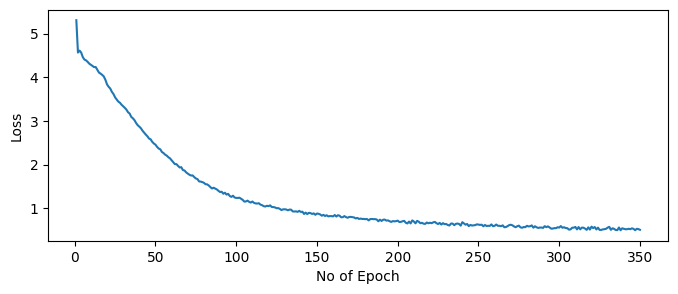

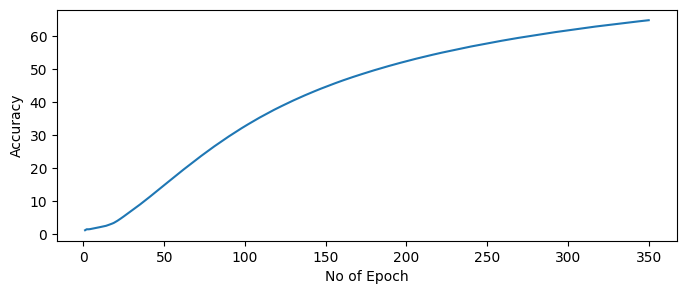

In [49]:

def loss_plot(epochs, loss):
    f = plt.figure()
    plt.xlabel('No of Epoch')
    plt.ylabel('Loss')
    f.set_figwidth(8)
    f.set_figheight(3)
    plt.plot(epochs, loss)

def acc_plot(epochs, Acc):
    f = plt.figure()
    plt.xlabel('No of Epoch')
    plt.ylabel('Accuracy')
    f.set_figwidth(8)
    f.set_figheight(3)
    plt.plot(epochs, Acc)

loss_plot(np.linspace(1, num_epochs, num_epochs).astype(int), loss_vals)
acc_plot(np.linspace(1, num_epochs, num_epochs).astype(int), Acc_val)

Ploting of Learning rate (cosine Annealing ), in paper [1] Learning rate was initialize from 0.02

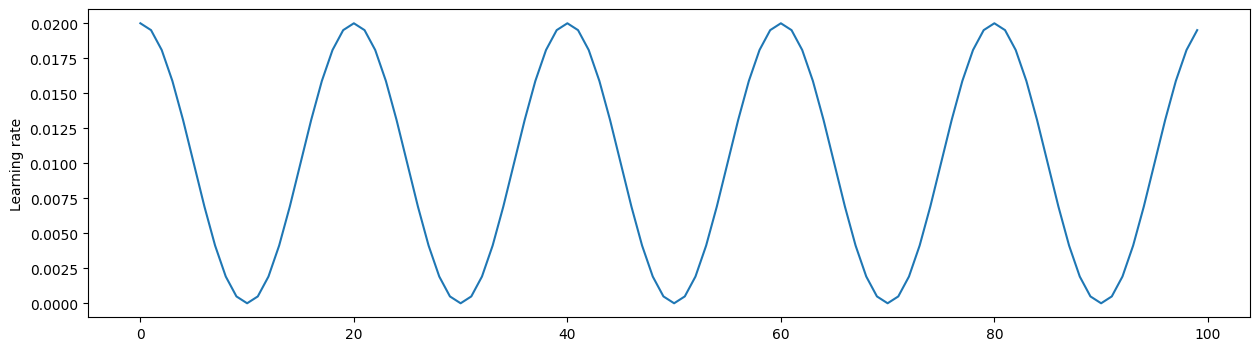

In [50]:

f = plt.figure()
plt.ylabel('Learning rate')
f.set_figwidth(15)
f.set_figheight(4) 
# plt.figure(figsize=(2, 2))
plt.plot(lrs[:100])

# Checking Accuracy of Train/Test Dataset After Pre-Training

In [61]:
# Check accuracy on training & test to see how good our model


def calculate_Accuracy(loader, model,type):
    if type=='Train':
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")

    num_correct_values = 0
    num_samples_values = 0
    model.eval()

    with torch.no_grad():
        for i, (x, y) in enumerate(tqdm(loader)):
            x = x.to(device)
            y = y.to(device)

            prediction = model(x)
            predicted = torch.argmax(prediction, 1)# if "1" is mentioned it will return tensor if not it will return index as an integer
            num_samples_values += predicted.size(0)
            num_correct_values += (predicted == y).sum().item()
            

        print(
            f"Got {num_correct_values} / {num_samples_values} with accuracy {float(num_correct_values)/float(num_samples_values)*100:.2f}"
        )

    model.train()


In [52]:
# Train Accuracy
calculate_Accuracy(train_loader_cifar100, model,"Train")

Checking accuracy on training data


100%|██████████| 98/98 [00:21<00:00,  4.62it/s]

Got 42199 / 50000 with accuracy 84.40


In [53]:
# Test Accuracy
calculate_Accuracy(test_loader_cifar100, model,'Test')

Checking accuracy on test data


100%|██████████| 20/20 [00:04<00:00,  4.64it/s]

Got 3422 / 10000 with accuracy 34.22


# Model Saved
Here we saved our model in a "results" folder of our device. save model can also be found on a github repository.

In [54]:
torch.save(model.state_dict(),'results/model.pt')
torch.save(optimizer.state_dict(),'results/optimizer.pt')
torch.save(scheduler.state_dict(),'results/scheduler.pt')

In [44]:
# Hyperparameters for Finetuning Dataset

batch_size2=256
num_epochs_cat_dog=20

# Load Dataset for Fine Tuning

Here we are loading a dataset for binary classification.

In [45]:

# Load Dataset

dataset_dog_cat = torchvision.datasets.ImageFolder('PetImages/',transform=transform)

train_set = int(len(dataset_dog_cat)*0.7)+1
test_set = int(len(dataset_dog_cat)*0.3)
print(train_set)
print(test_set)
print(len(dataset_dog_cat))

17499
7499
24998


In [46]:
train_dataset_dog_cat, test_dataset_dog_cat = torch.utils.data.random_split(dataset_dog_cat, [train_set, test_set])

train_loader_dog_cat = DataLoader(dataset=train_dataset_dog_cat, batch_size=batch_size2, shuffle=True)
test_loader_dog_cat = DataLoader(dataset=test_dataset_dog_cat, batch_size=batch_size2, shuffle=True)
sample_img_dog_cat=DataLoader(dataset=test_dataset_dog_cat, batch_size=40, shuffle=True)
dataset_dog_cat

Dataset ImageFolder
    Number of datapoints: 24998
    Root location: PetImages/
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [47]:
train_Data_dog_cat = enumerate(train_loader_dog_cat)
_train, (train_X_dog_cat, train_Y_dog_cat) = next(train_Data_dog_cat)

test_Data_dog_cat = enumerate(test_loader_dog_cat)
_test, (test_X_dog_cat, test_Y_dog_cat) = next(test_Data_dog_cat)

dataiter2 = iter(sample_img_dog_cat)
images2, labels2 = next(dataiter2)

Showing some random images from our second dataset.

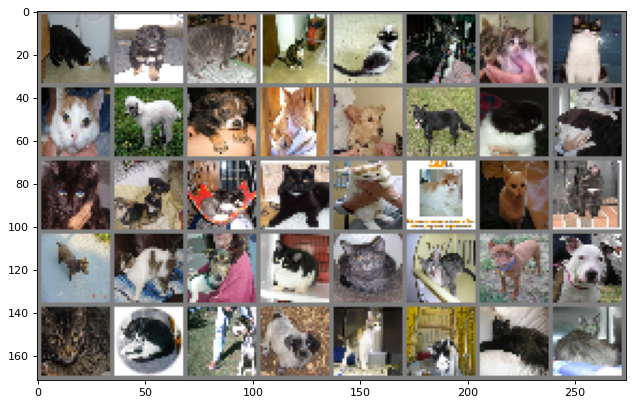

In [17]:
show_image(torchvision.utils.make_grid(images2))

Below function is used for finetuning, refrence was taken from mention pytorch documentaion. [[4]](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html)

In [48]:

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False


In [54]:
model_dog_cat = Convolutional_Vision_Transoformers(image_size,in_channel,num_classes) #32, 3, 100

In the below block of code we are loading our saved model for finetuning

In [55]:
model_dog_cat.load_state_dict(torch.load('results/model.pt'))
optimizer.load_state_dict(torch.load('results/optimizer.pt'))
scheduler.load_state_dict(torch.load('results/scheduler.pt'))

In [23]:
set_parameter_requires_grad(model_dog_cat, True)

In [109]:
# moving to GPU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device

device(type='cuda', index=0)

In [56]:
in_channel = 3
num_classes2 = 2
image_size = 32
'''
model_dog_cat.Head_mlp[1] = nn.Sequential(
                                          nn.Linear(model_dog_cat.Head_mlp[1].in_features, 4),
                                          nn.ReLU(),
                                          nn.Linear(4, 1)
      )'''

model_dog_cat.Head_mlp[1] = torch.nn.Linear(model.Head_mlp[1].in_features, 1)

model_dog_cat.to(device) # moving to GPU
lossfunct2 = nn.BCEWithLogitsLoss().to(device)
optimizer2 = optim.SGD(model_dog_cat.parameters(), lr=0.1, momentum=0.9) # as per paper



In [57]:

def train(data,num_epochs,model):

    n_samples=0
    n_correct=0
    for epoch in range(num_epochs):
        try:
            losses = []
            for batch_idx_train, (data_train, targets_train) in enumerate(tqdm(data)):
                # Get data to cuda if possible
                data_train = data_train.to(device)
                targets_train = targets_train.to(device)

                # forward
                output = model(data_train)
               
                # Accuracy
                predicted = torch.argmax(output, 1)# if "1" is mentioned it will return tensor if not it will return index as an integer
                n_samples += targets_train.size(0)
                n_correct += (predicted == targets_train).sum().item()
                acc = 100.0 * n_correct / n_samples

                targets_train = torch.reshape(targets_train,[targets_train.size(0), 1])
                
                    
                #losses
                loss_train = lossfunct2(output, targets_train.float())
                losses.append(loss_train.item())
                
                # backward
                optimizer2.zero_grad()
                loss_train.backward()

                # gradient descent or adam step
                optimizer2.step()

                
        except Exception as e:
            print(str(e))
            print(targets_train.shape)
            print(targets_train.dtype)
            print(output.shape)
            print(output.dtype)
        
        print(f"Epoch: {epoch+1}, Loss = {sum(losses)/len(losses):.5f}, Accuracy = {acc:.5f} %")





In [58]:

train(train_loader_dog_cat, num_epochs_cat_dog, model_dog_cat)

 72%|███████▏  | 50/69 [02:30<00:55,  2.94s/it]C:\Users\shahk\AppData\Roaming\Python\Python39\site-packages\PIL\TiffImagePlugin.py:850: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 69/69 [03:23<00:00,  2.96s/it]


Epoch: 1, Loss = 0.55972, Accuracy = 50.04857 %


100%|██████████| 69/69 [00:59<00:00,  1.17it/s]


Epoch: 2, Loss = 0.47367, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:00<00:00,  1.15it/s]


Epoch: 3, Loss = 0.43381, Accuracy = 50.04857 %


100%|██████████| 69/69 [00:57<00:00,  1.19it/s]


Epoch: 4, Loss = 0.38935, Accuracy = 50.04857 %


100%|██████████| 69/69 [00:57<00:00,  1.19it/s]


Epoch: 5, Loss = 0.35432, Accuracy = 50.04857 %


100%|██████████| 69/69 [00:59<00:00,  1.16it/s]


Epoch: 6, Loss = 0.31045, Accuracy = 50.04857 %


100%|██████████| 69/69 [00:59<00:00,  1.17it/s]


Epoch: 7, Loss = 0.25780, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:02<00:00,  1.11it/s]


Epoch: 8, Loss = 0.20909, Accuracy = 50.04857 %


100%|██████████| 69/69 [00:58<00:00,  1.18it/s]


Epoch: 9, Loss = 0.15378, Accuracy = 50.04857 %


100%|██████████| 69/69 [00:54<00:00,  1.26it/s]


Epoch: 10, Loss = 0.13686, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:03<00:00,  1.08it/s]


Epoch: 11, Loss = 0.13993, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:11<00:00,  1.04s/it]


Epoch: 12, Loss = 0.09110, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:09<00:00,  1.01s/it]


Epoch: 13, Loss = 0.08402, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:05<00:00,  1.06it/s]


Epoch: 14, Loss = 0.06754, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:02<00:00,  1.11it/s]


Epoch: 15, Loss = 0.05559, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:06<00:00,  1.03it/s]


Epoch: 16, Loss = 0.04925, Accuracy = 50.04857 %


100%|██████████| 69/69 [00:57<00:00,  1.19it/s]


Epoch: 17, Loss = 0.06486, Accuracy = 50.04857 %


100%|██████████| 69/69 [00:59<00:00,  1.15it/s]


Epoch: 18, Loss = 0.06028, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:53<00:00,  1.65s/it]


Epoch: 19, Loss = 0.04329, Accuracy = 50.04857 %


100%|██████████| 69/69 [01:59<00:00,  1.72s/it]

Epoch: 20, Loss = 0.05300, Accuracy = 50.04857 %


# Check Accuracy of Train/Test Dataset

In [62]:
# Train Accuracy
calculate_Accuracy(train_loader_dog_cat, model_dog_cat,"Train")

Checking accuracy on training data


100%|██████████| 69/69 [01:32<00:00,  1.35s/it]

Got 8758 / 17499 with accuracy 50.05


In [63]:
# Test Accuracy
calculate_Accuracy(test_loader_dog_cat, model_dog_cat,'Test')

Checking accuracy on test data


100%|██████████| 30/30 [01:51<00:00,  3.71s/it]

Got 3741 / 7499 with accuracy 49.89


In [30]:
# Load Dataset 2 for fine tuning

dataset_Food = torchvision.datasets.ImageFolder('Dataset3/',transform=transform)

train_set3 = int(len(dataset_Food)*0.7)+1
test_set3 = int(len(dataset_Food)*0.3)
print(train_set3)
print(test_set3)
print(len(dataset_Food))
train_dataset_Food, test_dataset_Food = torch.utils.data.random_split(dataset_Food, [train_set3, test_set3])

train_loader_Food = DataLoader(dataset=train_dataset_Food, batch_size=batch_size2, shuffle=True)
test_loader_Food = DataLoader(dataset=test_dataset_Food, batch_size=batch_size2, shuffle=True)
sample_img_Food=DataLoader(dataset=train_dataset_Food, batch_size=40, shuffle=True)
dataset_Food 



9404
4030
13434


Dataset ImageFolder
    Number of datapoints: 13434
    Root location: Dataset3/
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

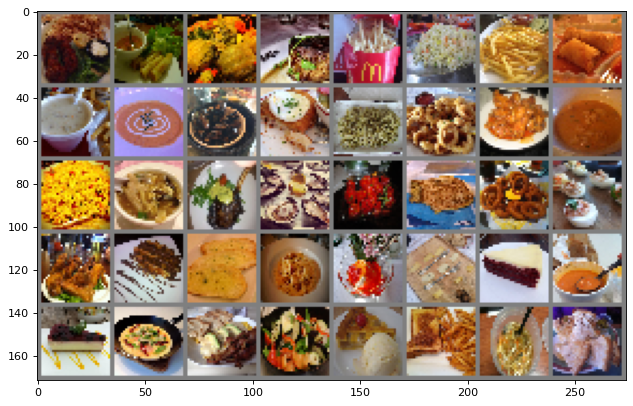

In [65]:
dataiter3 = iter(sample_img_Food)
images3, labels3 = next(dataiter3)
show_image(torchvision.utils.make_grid(images3))

model_Food = Convolutional_Vision_Transoformers(image_size,in_channel,num_classes) #32, 3, 100

In [66]:
model_Food.load_state_dict(torch.load('results/model.pt'))
optimizer.load_state_dict(torch.load('results/optimizer.pt'))
scheduler.load_state_dict(torch.load('results/scheduler.pt'))

In [142]:
set_parameter_requires_grad(model_Food, True)

In [143]:
model_Food.Head_mlp[1] = torch.nn.Linear(model.Head_mlp[1].in_features, 11)

# model_Food.Head_mlp[1] = nn.Sequential(
#                                           nn.Linear(model_dog_cat.Head_mlp[1].in_features, 4),
#                                           nn.ReLU(),
#                                           nn.Linear(4, 11))
model_Food.to(device) # moving to GPU
lossfunct2 = nn.CrossEntropyLoss() 
optimizer2 = optim.SGD(model_Food.parameters(), lr=0.1, momentum=0.9) # as per paper
tar_size2=11
num_epochs_food=50

In [144]:
loss_vals3=  []
Acc_val3=[]
def train3(data,num_epochs,model):

    n_samples=0
    n_correct=0
    for epoch in range(num_epochs):
        try:
            losses = []
            for batch_idx_train, (data_train, targets_train) in enumerate(tqdm(data)):
                # Get data to cuda if possible
                data_train = data_train.to(device)
                targets_train = targets_train.to(device)

                # forward
                output = model(data_train)
               
                # Accuracy
                predicted = torch.argmax(output, 1)# if "1" is mentioned it will return tensor if not it will return index as an integer
                n_samples += targets_train.size(0)
                n_correct += (predicted == targets_train).sum().item()
                acc = 100.0 * n_correct / n_samples

                # targets_train = torch.reshape(targets_train,[targets_train.size(0), 1])
                
                    
                #losses
                loss_train = lossfunct2(output, targets_train)
                losses.append(loss_train.item())
                
                # backward
                optimizer2.zero_grad()
                loss_train.backward()

                # gradient descent or adam step
                optimizer2.step()

                
        except Exception as e:
            print(str(e))
            print(targets_train.shape)
            print(targets_train.dtype)
            print(output.shape)
            print(output.dtype)
        #Plotting
        loss_vals3.append(sum(losses)/len(losses))
        Acc_val3.append(acc)
        print(f"Epoch: {epoch+1}, Loss = {sum(losses)/len(losses):.5f}, Accuracy = {acc:.5f} %")

In [145]:
train3(train_loader_Food, num_epochs_food, model_Food)

100%|██████████| 37/37 [01:15<00:00,  2.04s/it]


Epoch: 1, Loss = 1.93547, Accuracy = 33.06040 %


100%|██████████| 37/37 [01:04<00:00,  1.73s/it]


Epoch: 2, Loss = 1.60079, Accuracy = 38.84517 %


100%|██████████| 37/37 [01:02<00:00,  1.69s/it]


Epoch: 3, Loss = 1.45822, Accuracy = 42.43584 %


100%|██████████| 37/37 [01:02<00:00,  1.70s/it]


Epoch: 4, Loss = 1.35052, Accuracy = 45.19885 %


100%|██████████| 37/37 [01:02<00:00,  1.69s/it]


Epoch: 5, Loss = 1.21001, Accuracy = 47.77329 %


100%|██████████| 37/37 [01:01<00:00,  1.67s/it]


Epoch: 6, Loss = 1.09224, Accuracy = 50.19318 %


100%|██████████| 37/37 [01:04<00:00,  1.74s/it]


Epoch: 7, Loss = 0.96344, Accuracy = 52.56426 %


100%|██████████| 37/37 [01:07<00:00,  1.84s/it]


Epoch: 8, Loss = 0.83532, Accuracy = 54.89419 %


100%|██████████| 37/37 [01:06<00:00,  1.79s/it]


Epoch: 9, Loss = 0.67389, Accuracy = 57.28886 %


100%|██████████| 37/37 [01:02<00:00,  1.70s/it]


Epoch: 10, Loss = 0.52669, Accuracy = 59.67992 %


100%|██████████| 37/37 [01:04<00:00,  1.76s/it]


Epoch: 11, Loss = 0.49400, Accuracy = 61.71068 %


100%|██████████| 37/37 [01:07<00:00,  1.83s/it]


Epoch: 12, Loss = 0.41180, Accuracy = 63.67149 %


100%|██████████| 37/37 [01:07<00:00,  1.81s/it]


Epoch: 13, Loss = 0.33006, Accuracy = 65.53349 %


100%|██████████| 37/37 [01:04<00:00,  1.73s/it]


Epoch: 14, Loss = 0.27269, Accuracy = 67.26849 %


100%|██████████| 37/37 [01:05<00:00,  1.76s/it]


Epoch: 15, Loss = 0.23006, Accuracy = 68.88558 %


100%|██████████| 37/37 [01:04<00:00,  1.76s/it]


Epoch: 16, Loss = 0.20755, Accuracy = 70.34108 %


100%|██████████| 37/37 [01:04<00:00,  1.75s/it]


Epoch: 17, Loss = 0.20997, Accuracy = 71.62096 %


100%|██████████| 37/37 [01:05<00:00,  1.78s/it]


Epoch: 18, Loss = 0.18209, Accuracy = 72.81122 %


100%|██████████| 37/37 [01:07<00:00,  1.83s/it]


Epoch: 19, Loss = 0.17493, Accuracy = 73.90472 %


100%|██████████| 37/37 [01:08<00:00,  1.85s/it]


Epoch: 20, Loss = 0.19536, Accuracy = 74.83305 %


100%|██████████| 37/37 [01:02<00:00,  1.70s/it]


Epoch: 21, Loss = 0.15447, Accuracy = 75.75095 %


100%|██████████| 37/37 [01:04<00:00,  1.73s/it]


Epoch: 22, Loss = 0.12269, Accuracy = 76.64775 %


100%|██████████| 37/37 [01:07<00:00,  1.83s/it]


Epoch: 23, Loss = 0.10326, Accuracy = 77.48414 %


100%|██████████| 37/37 [01:20<00:00,  2.17s/it]


Epoch: 24, Loss = 0.07484, Accuracy = 78.28761 %


100%|██████████| 37/37 [01:30<00:00,  2.44s/it]


Epoch: 25, Loss = 0.06726, Accuracy = 79.02467 %


100%|██████████| 37/37 [01:43<00:00,  2.81s/it]


Epoch: 26, Loss = 0.05862, Accuracy = 79.72794 %


100%|██████████| 37/37 [01:36<00:00,  2.61s/it]


Epoch: 27, Loss = 0.05220, Accuracy = 80.37754 %


100%|██████████| 37/37 [01:38<00:00,  2.67s/it]


Epoch: 28, Loss = 0.05283, Accuracy = 80.98112 %


100%|██████████| 37/37 [01:29<00:00,  2.43s/it]


Epoch: 29, Loss = 0.04607, Accuracy = 81.55627 %


100%|██████████| 37/37 [01:34<00:00,  2.55s/it]


Epoch: 30, Loss = 0.04580, Accuracy = 82.08493 %


100%|██████████| 37/37 [01:26<00:00,  2.34s/it]


Epoch: 31, Loss = 0.04511, Accuracy = 82.58051 %


100%|██████████| 37/37 [01:11<00:00,  1.93s/it]


Epoch: 32, Loss = 0.04320, Accuracy = 83.04810 %


100%|██████████| 37/37 [01:02<00:00,  1.68s/it]


Epoch: 33, Loss = 0.04334, Accuracy = 83.49026 %


100%|██████████| 37/37 [01:01<00:00,  1.67s/it]


Epoch: 34, Loss = 0.04319, Accuracy = 83.89890 %


100%|██████████| 37/37 [01:04<00:00,  1.73s/it]


Epoch: 35, Loss = 0.04675, Accuracy = 84.29058 %


100%|██████████| 37/37 [01:01<00:00,  1.66s/it]


Epoch: 36, Loss = 0.04472, Accuracy = 84.65842 %


100%|██████████| 37/37 [01:01<00:00,  1.65s/it]


Epoch: 37, Loss = 0.04271, Accuracy = 85.00121 %


100%|██████████| 37/37 [01:00<00:00,  1.63s/it]


Epoch: 38, Loss = 0.04370, Accuracy = 85.32875 %


100%|██████████| 37/37 [01:00<00:00,  1.64s/it]


Epoch: 39, Loss = 0.04210, Accuracy = 85.64195 %


100%|██████████| 37/37 [01:02<00:00,  1.68s/it]


Epoch: 40, Loss = 0.04123, Accuracy = 85.94215 %


100%|██████████| 37/37 [01:18<00:00,  2.13s/it]


Epoch: 41, Loss = 0.04050, Accuracy = 86.22486 %


100%|██████████| 37/37 [01:05<00:00,  1.76s/it]


Epoch: 42, Loss = 0.04454, Accuracy = 86.49283 %


100%|██████████| 37/37 [01:01<00:00,  1.67s/it]


Epoch: 43, Loss = 0.03963, Accuracy = 86.74760 %


100%|██████████| 37/37 [01:07<00:00,  1.83s/it]


Epoch: 44, Loss = 0.04077, Accuracy = 86.99514 %


100%|██████████| 37/37 [01:05<00:00,  1.77s/it]


Epoch: 45, Loss = 0.03997, Accuracy = 87.22671 %


100%|██████████| 37/37 [01:02<00:00,  1.69s/it]


Epoch: 46, Loss = 0.04094, Accuracy = 87.44845 %


100%|██████████| 37/37 [01:05<00:00,  1.78s/it]


Epoch: 47, Loss = 0.03910, Accuracy = 87.66550 %


100%|██████████| 37/37 [01:04<00:00,  1.74s/it]


Epoch: 48, Loss = 0.03876, Accuracy = 87.87307 %


100%|██████████| 37/37 [01:00<00:00,  1.65s/it]


Epoch: 49, Loss = 0.04237, Accuracy = 88.07455 %


100%|██████████| 37/37 [01:03<00:00,  1.71s/it]

Epoch: 50, Loss = 0.04070, Accuracy = 88.26308 %


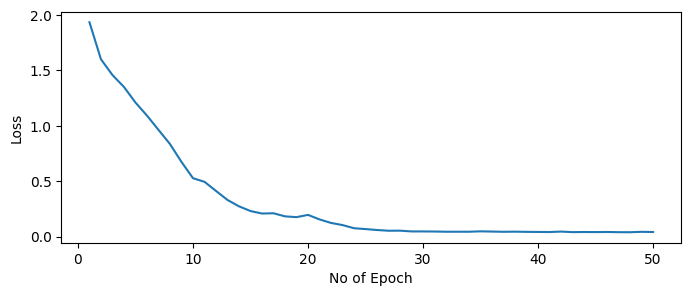

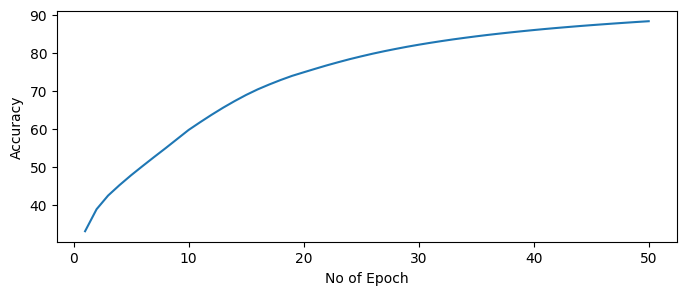

In [149]:
def loss_plot(epochs, loss):
    f = plt.figure()
    plt.xlabel('No of Epoch')
    plt.ylabel('Loss')
    f.set_figwidth(8)
    f.set_figheight(3)
    plt.plot(epochs, loss)

def acc_plot(epochs, Acc):
    f = plt.figure()
    plt.xlabel('No of Epoch')
    plt.ylabel('Accuracy')
    f.set_figwidth(8)
    f.set_figheight(3)
    plt.plot(epochs, Acc)



loss_plot(np.linspace(1, num_epochs_food, num_epochs_food).astype(int), loss_vals3)
acc_plot(np.linspace(1, num_epochs_food, num_epochs_food).astype(int), Acc_val3)

In [151]:
# Train Accuracy
calculate_Accuracy(train_loader_Food, model_Food,"Train")
# Test Accuracy
calculate_Accuracy(test_loader_Food, model_Food,'Test')


Checking accuracy on training data


100%|██████████| 37/37 [01:05<00:00,  1.77s/it]


Got 9216 / 9404 with accuracy 98.00
Checking accuracy on test data


100%|██████████| 16/16 [00:27<00:00,  1.73s/it]

Got 1676 / 4030 with accuracy 41.59


# Conclusion and Summary

In Summary we have implemented low scale version of Convolutional vision transformer proposed in paper [1] with low resolution pictures and a very small dataset due to our machine capability. we conclude that if we pretrained our model as well on a large dataset we will also be able to achive a decent accuracy. On CatVsDog dataset we were able to get accuracy around 50% and in Food dataset with 13000 images and 11 classes accuracy was 42%. below mentioned action could increase our accuracy further.
- We are feeding an input of 32x32 which in the last stage of model downsampled to 2x2, this can be one of the reason of low accuracy. By feeding a dataset of high resolution pictures, accuracy can be improved.
- Model must be trained on a larger dataset.
- If dataset is not large enough we should increase number of epoch for pretraining for better accuracy.
- Bacth size can be reduced for better accuracy.

This project allow us to understand state of the art method for image classification and also the importance of setting the correct hyperparameters to balance between computaional time and accuracy.


# Refrences

Below are the refrences that were used in this project
- [1] CvT: Introducing Convolutions to Vision Transformers -Haiping Wu, Bin Xiao, Noel Codella, Mengchen Liu, Xiyang Dai, Lu Yuan, Lei Zhang (https://arxiv.org/pdf/2103.15808)
- [2] AN IMAGE IS WORTH 16X16 WORDS: TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE -Alexey Dosovitskiy∗,† Lucas Beyer∗, Alexander Kolesnikov∗ , Dirk Weissenborn∗ , Xiaohua Zhai∗, Thomas Unterthiner, Mostafa Dehghani, Matthias Minderer,Georg Heigold, Sylvain Gelly, Jakob Uszkoreit, Neil Houlsby∗ (https://arxiv.org/pdf/2010.11929v2.pdf)
- [3] Cats and Dogs Dataset (https://www.microsoft.com/en-us/download/details.aspx?id=54765)
- [4] Code refrence for fine tuning function (https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html)
- [5] Kaggle Food dataset-11 classes (https://www.kaggle.com/datasets/trolukovich/food11-image-dataset?select=training)
- [6] Git hub repo(https://github.com/lucidrains/vit-pytorch)